In [1]:
import torch
import torch.nn as nn
import numpy as np

In [2]:
#
#        -> 2.0              -> 0.65  
# Linear -> 1.0  -> Softmax  -> 0.25   -> CrossEntropy(y, y_hat)
#        -> 0.1              -> 0.1                   
#
#     scores(logits)      probabilities
#                           sum = 1.0

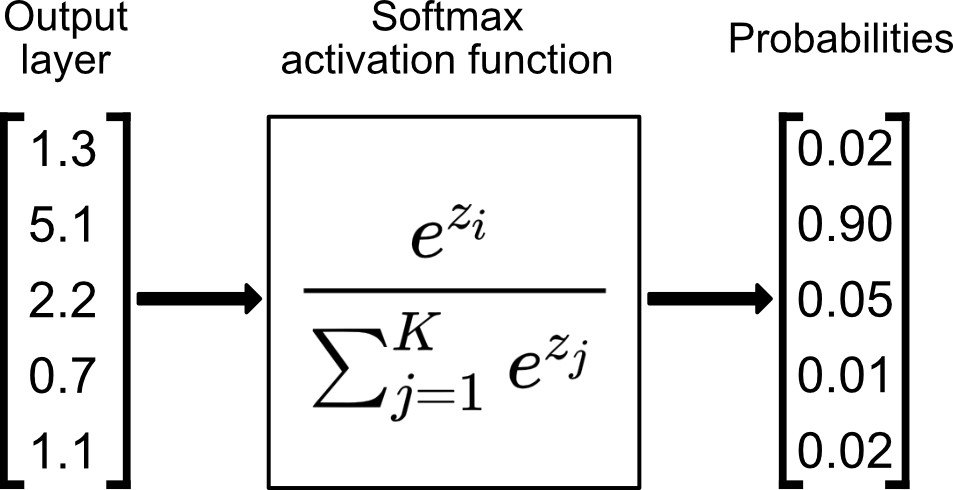

In [3]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis = 0)

In [4]:
# Case 1 : numpy
x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy : ', outputs)

softmax numpy :  [0.65900114 0.24243297 0.09856589]


In [5]:
# Case 2 : tensor
x = torch.tensor([2.0,1.0,0.1])
outputs = torch.softmax(x, dim = 0)
print('softmax torch : ', outputs)

softmax torch :  tensor([0.6590, 0.2424, 0.0986])


In [6]:
def cross_entropy(actual, predicted):
  EPS = 1e-15
  predicted = np.clip(predicted, EPS, 1-EPS)
  loss = -np.sum(actual * np.log(predicted))
  return loss

In [7]:
# Case 1 : numpy

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]

Y = np.array([1,0,0])
Y_pred_good = np.array([0.7, 0.2, 0.1]) # Lower Loss
Y_pred_bad = np.array([0.1, 0.3, 0.6]) # Higher Loss

Loss_good = cross_entropy(Y, Y_pred_good)
Loss_bad = cross_entropy(Y, Y_pred_bad)

print(f'Loss Good numpy : {Loss_good:.4f}') # Lower Loss
print(f'Loss Bad numpy : {Loss_bad:.4f}') # Higher Loss

Loss Good numpy : 0.3567
Loss Bad numpy : 2.3026


In [8]:
# Case 2 : tensor(1 x 3)

loss = nn.CrossEntropyLoss()

# target is of size nSamples = 1
# each element has class label: 0, 1, or 2
# Y (=target) contains class labels, not one-hot(like in numpy)
Y = torch.tensor([0]) # Class Label = 0

Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) # Lower Loss
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]]) # Higher Loss

Loss_good = loss(Y_pred_good, Y)
Loss_bad = loss(Y_pred_bad, Y)

print(f'Loss Good tensor : {Loss_good:.4f}') # Lower Loss
print(f'Loss Bad tensor : {Loss_bad:.4f}') # Higher Loss

Loss Good tensor : 0.4170
Loss Bad tensor : 1.8406


In [9]:
# Prediction

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')

Actual class: 0, Y_pred1: 0, Y_pred2: 1


In [11]:
# Case 3 : tensor(3 x 3)

Y = torch.tensor([2,0,1])

# Lower Loss
Y_pred_good = torch.tensor(
    [[0.1,0.2,3.9], # predict class 2
     [0.1,0.3,1.5], # predict class 0
     [0.3,2.2,0.2]] # predict class 1
)

# Higher Loss
Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]]
)

Loss_good = loss(Y_pred_good, Y)
Loss_bad = loss(Y_pred_bad, Y)

print(f'Loss Good tensor : {Loss_good:.4f}') # Lower Loss
print(f'Loss Bad tensor : {Loss_bad:.4f}') # Higher Loss

Loss Good tensor : 0.7112
Loss Bad tensor : 1.6418


In [14]:
# Prediction

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')

Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 2, 1]), Y_pred2: tensor([0, 2, 0])


In [16]:
# Binary Classification
class NeuralNet1(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet1, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)
  
  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    # sigmoid at the end
    y_pred = torch.sigmoid(out)
    return y_pred

In [17]:
model = NeuralNet1(input_size = 28*28, hidden_size = 5)
criterion = nn.BCELoss()

In [19]:
# Multiclass problem
class NeuralNet2(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    # no softmax at the end : loss is going to be crossentropyloss
    return out

In [20]:
model = NeuralNet2(input_size = 28*28, hidden_size = 5, num_classes = 3)
criterion = nn.CrossEntropyLoss() # (applies Softmax)